目标页面如下：  

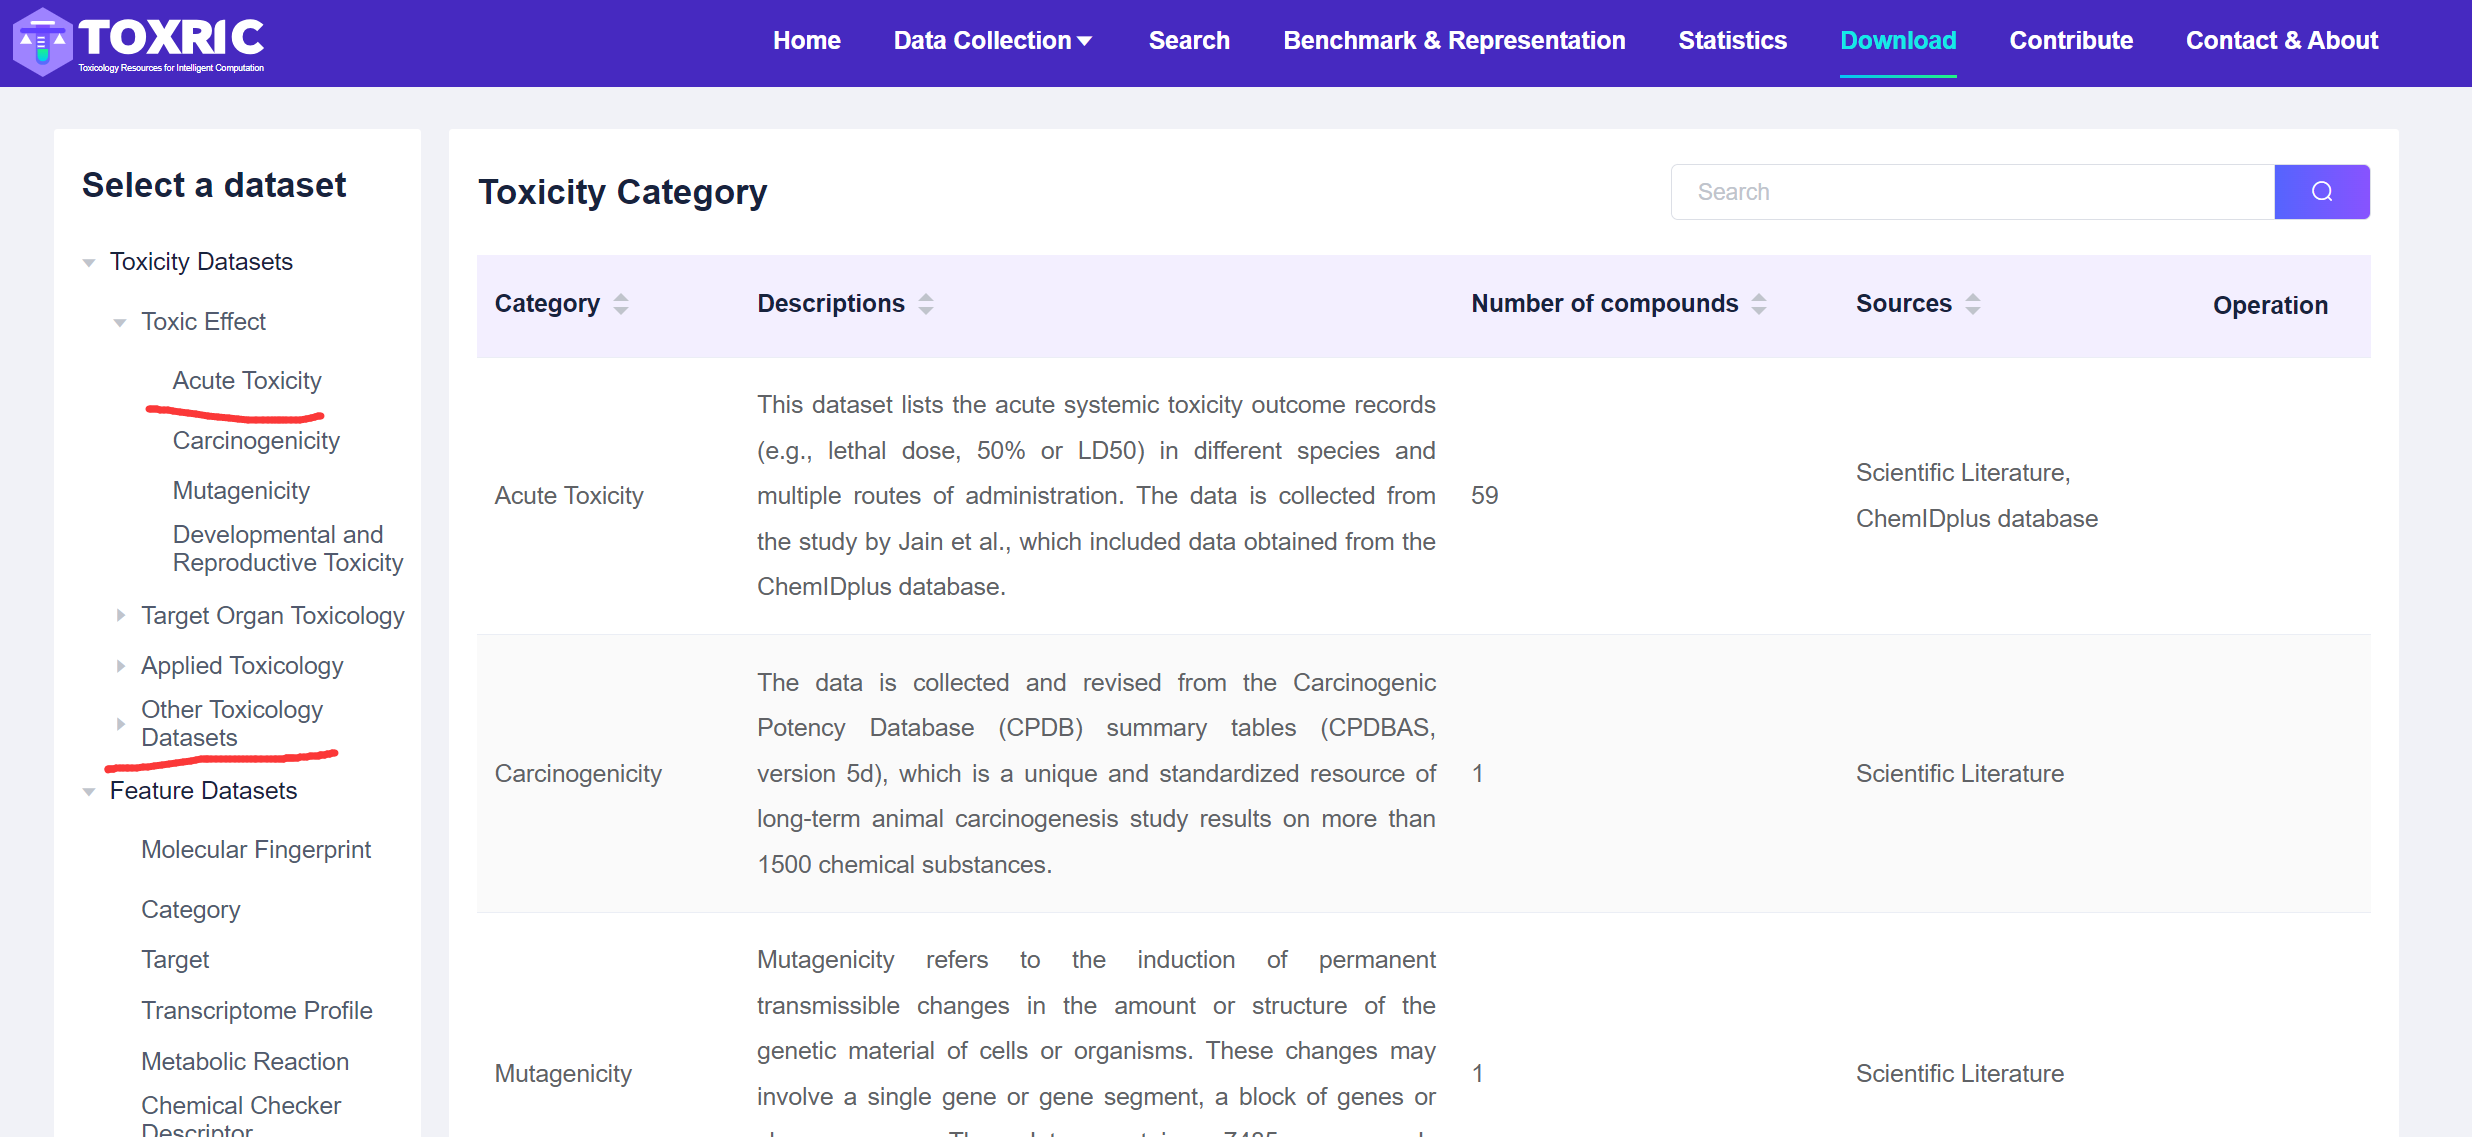

需要爬取 ：  
1、'Other Toxicology Datasets' 下的 'ToxCast&Tox21 Assay'内的所有数据，默认父标签没展开，所以看不到'ToxCast&Tox21 Assay'  
2、'Acute Toxicity'

展开后：  
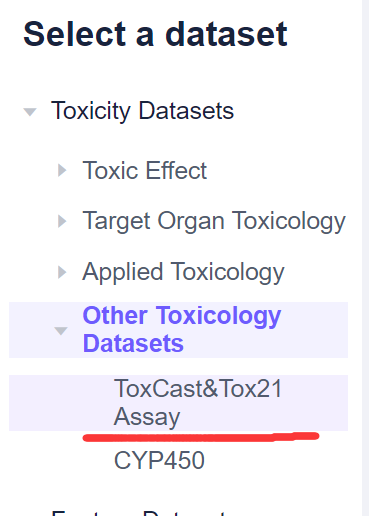

默认10条/页  改为50条/页后可提高速度   
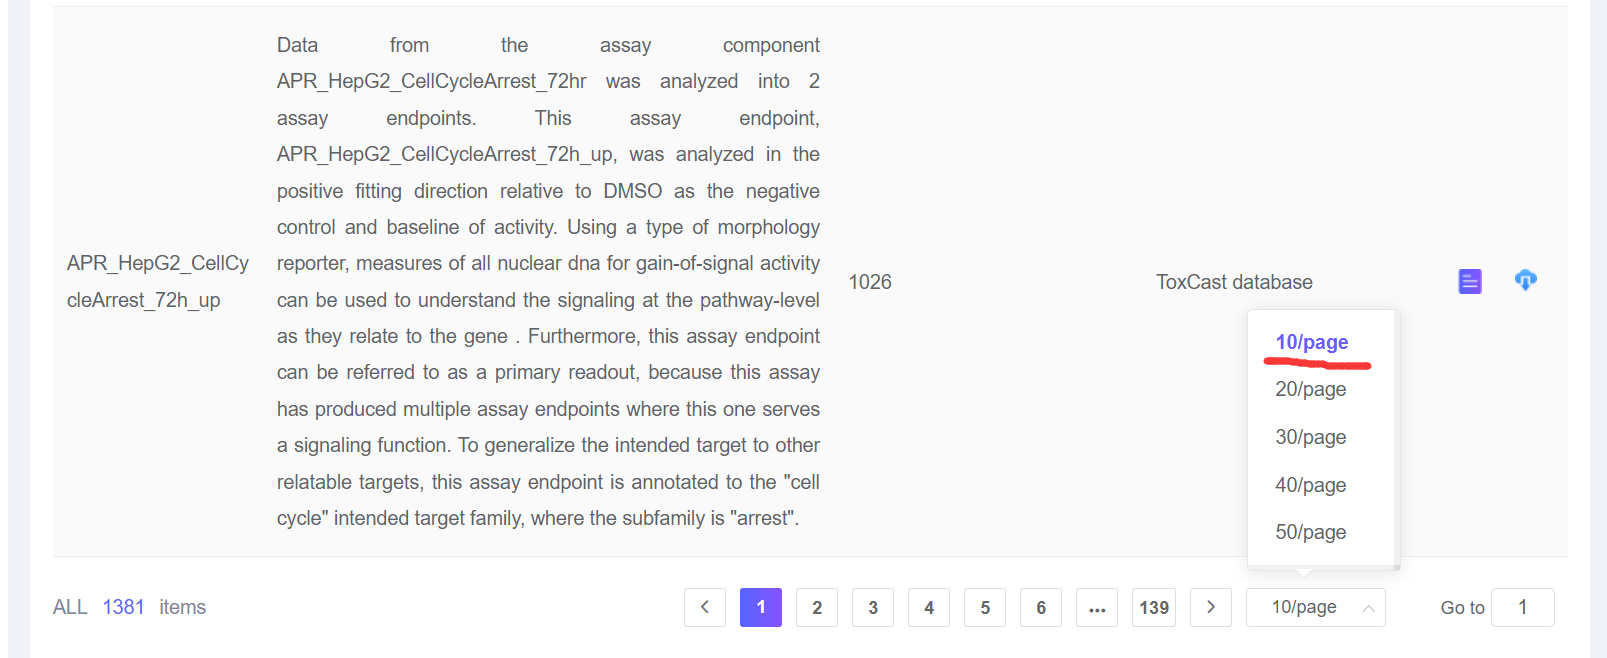

只有子标签的使用该按钮：  
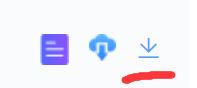  
有父标签的使用该按钮：  
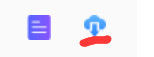

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.webdriver.common.keys import Keys

In [9]:
url ='https://toxric.bioinforai.tech/download'
timeout =200

In [10]:
# 打开网页
edge_options=webdriver.EdgeOptions()
edge_options.add_argument('--ignore-certificate-errors')
driver=webdriver.Edge(options=edge_options)
driver.get(url)

In [11]:
# 定义爬取函数
# 父标签 子标签 最大页数
# 需要展开父标签的话 传入父标签 否则传入''即可 子标签是必须要传入的 最大页数需要观察50条/页后还有多少页
def getData(father_label,son_label,max_page):
    curr_page = 1
    while curr_page <= max_page:
        # 如果传入父标签 就打开父标签
        if father_label != '':
            # 使用显式等待确保页面加载完毕
            span_f = WebDriverWait(driver, timeout).until(
                EC.presence_of_element_located((By.XPATH, f'//span[text()="{father_label}"]'))
            )
            # 点击元素
            span_f.click()
            time.sleep(1)

        # 点击子标签
        span_s = WebDriverWait(driver, timeout).until(
            EC.presence_of_element_located((By.XPATH, f'//span[text()="{son_label}"]'))
        )
        print(span_s.get_attribute('outerHTML'))
        span_s.click()
        time.sleep(1)

        # 改为50一页
        driver.find_element(By.XPATH,'//input[@readonly="readonly"]').click()
        time.sleep(1)
        page_50 = WebDriverWait(driver, timeout).until(
            EC.presence_of_element_located((By.XPATH,'//span[text()="50/page"]'))
        )
        page_50.click()
        time.sleep(1)
    
        # 跳转到指定页码
        number_input = driver.find_element(By.XPATH,'//input[@type="number"]')
        number_input.clear()
        time.sleep(1)
        number_input.send_keys(curr_page)
        number_input.send_keys(Keys.RETURN)
        time.sleep(3)
        
        # 如果传入了父标签 就点击第一个下载按钮
        if father_label != '':
            cells = driver.find_elements(By.CLASS_NAME,'el-tooltip.btns_download')
            for e in cells[0::2]:
                e.click()
        # 否则 就点击第二个下载按钮
        else:
            cells = driver.find_elements(By.CLASS_NAME,'el-tooltip.el-icon.el-icon-download')
            for e in cells:
                e.click()
        time.sleep(5)
        # 页数加一 然后刷新页面
        curr_page += 1
        driver.refresh()

In [12]:
# max_page = int(input('请输入总页数：'))
# father_label = input('请输入需要点击的父标签(不需要打开就不输入)：')
# son_label = input('请输入需要点击的子标签：')
# getData(father_label,son_label,max_page)

# 父标签 子标签 最大页数
# 'Other Toxicology Datasets','ToxCast&Tox21 Assay'
# 'Acute Toxicity'
# getData('Other Toxicology Datasets','ToxCast&Tox21 Assay',2)
getData('','Acute Toxicity',2)

<span class="el-tree-node__label">Acute Toxicity</span>
<span class="el-tree-node__label">Acute Toxicity</span>


以Acute Toxicity为例：  
爬取结果如下：  
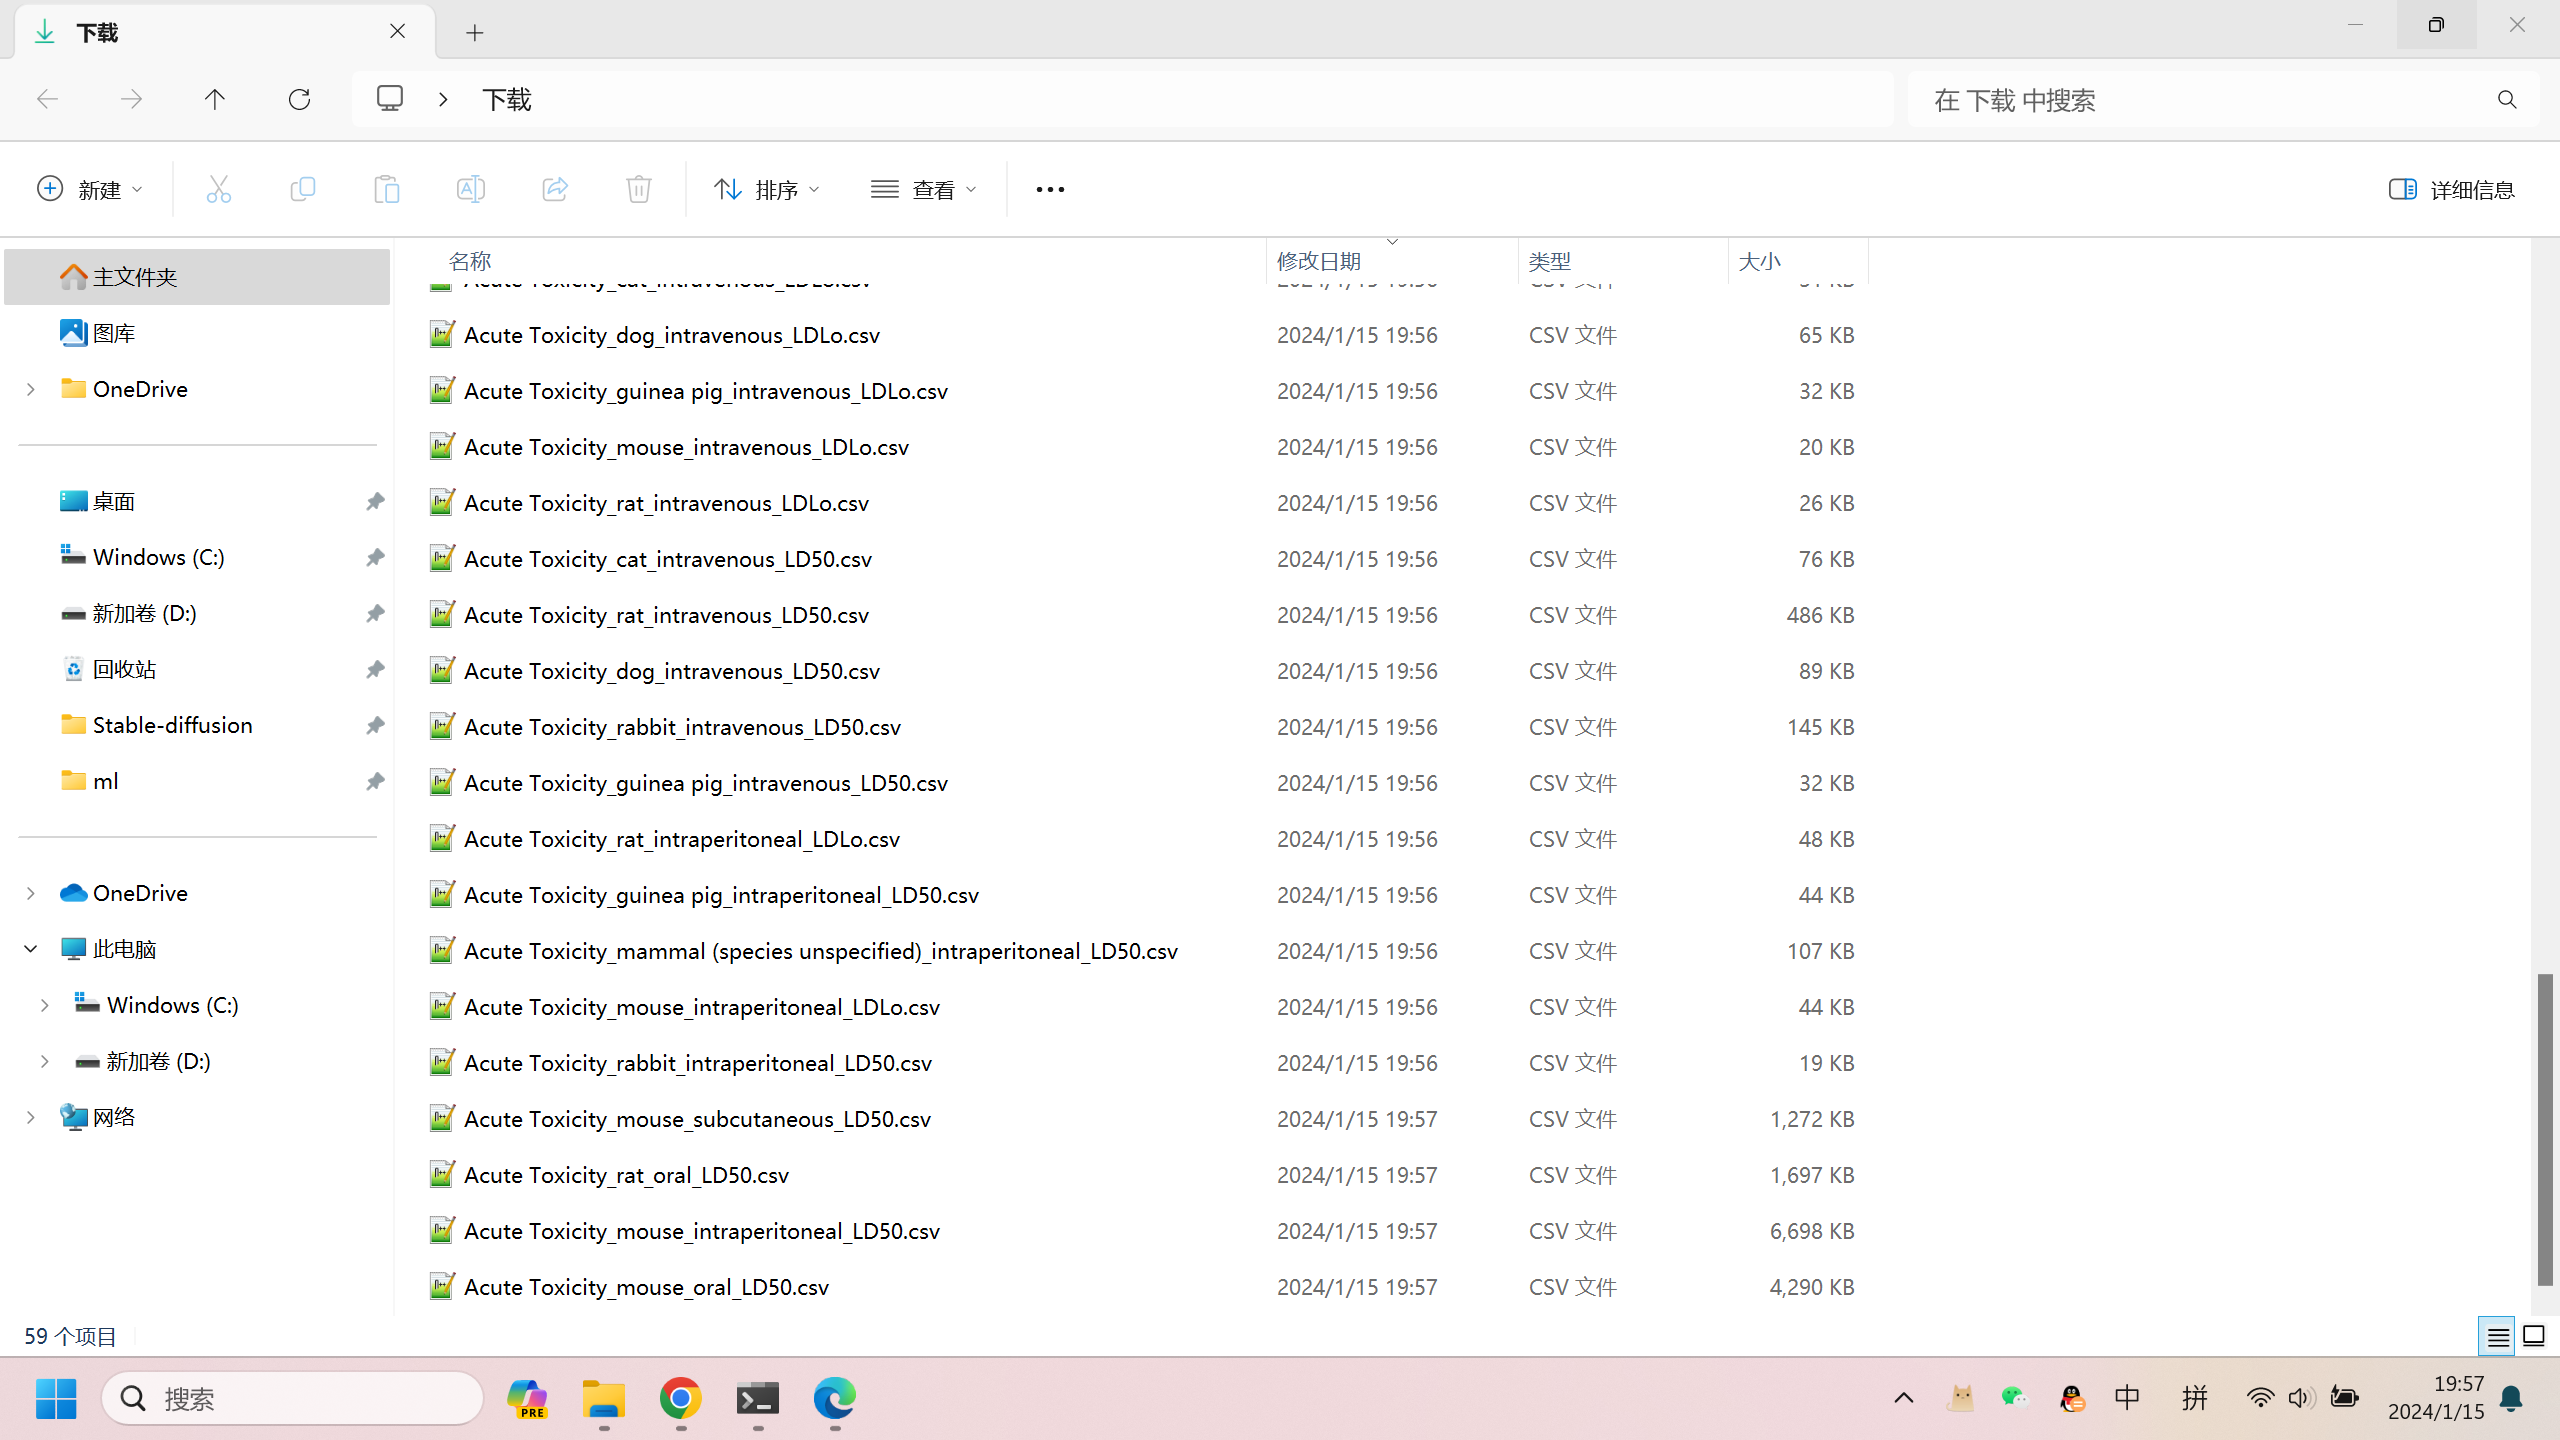  
与网页中的59条吻合
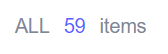  